## TASK 2C

* **Name :** M.Rachel
* **Student No. :** 224234147
* **Deakin Mail :** s224234147@deakin.edu.au
* **Email Address:** rachelriney1608@gmail.com

### PROBLEM STATEMENT

This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III.

## Features:

* Gender
* Age	
* Height	
* Weight	
* family_history_with_overweight	
* FAVC	
* FCVC	
* NCP	
* CAEC	
* SMOKE	
* CH2O	
* SCC	
* FAF	
* TUE	
* CALC	
* MTRANS	

### Target:

* NObeyesdad

#### 1) Load the “Obesity” dataset. Remove unwanted features if required.

In [1]:
# Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the dataset
df = pd.read_csv("F:/Data Science/Datasets/ObesityDataSet_raw_and_data_sinthetic.csv")

In [3]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
df.shape

(2111, 17)

* There are 2111 rows and 17 columns.

In [5]:
#check the information the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [6]:
#checking data description for null values and data description
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


* From the data description it shows there is no null values.
* But some preprocessing need to be done like changing the column names.
* Need of Label encoding.

In [7]:
# change column names
df.rename(columns={'FAVC': 'freq_high_cal','FCVC':'veg_intake','NCP':'num_main_meals','CAEC':'food_btw_meals','CH2O':'water','SCC':'mntr_cal','FAF':'phy_act','TUE':'tech_use','CALC':'alcohol','MTRANS':'transport','NObeyesdad':'obesity'},inplace=True)

In [8]:
#check null values
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
freq_high_cal                     0
veg_intake                        0
num_main_meals                    0
food_btw_meals                    0
SMOKE                             0
water                             0
mntr_cal                          0
phy_act                           0
tech_use                          0
alcohol                           0
transport                         0
obesity                           0
dtype: int64

In [9]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,freq_high_cal,veg_intake,num_main_meals,food_btw_meals,SMOKE,water,mntr_cal,phy_act,tech_use,alcohol,transport,obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


#### Observing the categorical features for understanding the data for encoding to further model building.

In [10]:
df.food_btw_meals.value_counts()

food_btw_meals
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64

In [11]:
df.alcohol.value_counts()

alcohol
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64

In [12]:
df.transport.value_counts()

transport
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64

In [13]:
df.obesity.value_counts()

obesity
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

* From the target variable there is a multi class so we go for label encoding to change the categorical to binary.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   freq_high_cal                   2111 non-null   object 
 6   veg_intake                      2111 non-null   float64
 7   num_main_meals                  2111 non-null   float64
 8   food_btw_meals                  2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  water                           2111 non-null   float64
 11  mntr_cal                        2111 non-null   object 
 12  phy_act                         21

In [15]:
# Label Encode all the categorical values to Numerical values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Apply label encoding to multiple columns
for column in ['Gender', 'family_history_with_overweight', 'freq_high_cal','food_btw_meals','SMOKE','mntr_cal','alcohol','transport','obesity']:
    df[column] = le.fit_transform(df[column])

df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,freq_high_cal,veg_intake,num_main_meals,food_btw_meals,SMOKE,water,mntr_cal,phy_act,tech_use,alcohol,transport,obesity
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


#### 2) Select the optimum k value using Silhouette Coefficient and plot the optimum k values.

In [16]:
X=df.drop('obesity',axis=1)
y=df['obesity']

* Splitted the dataset to training and testing set 

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

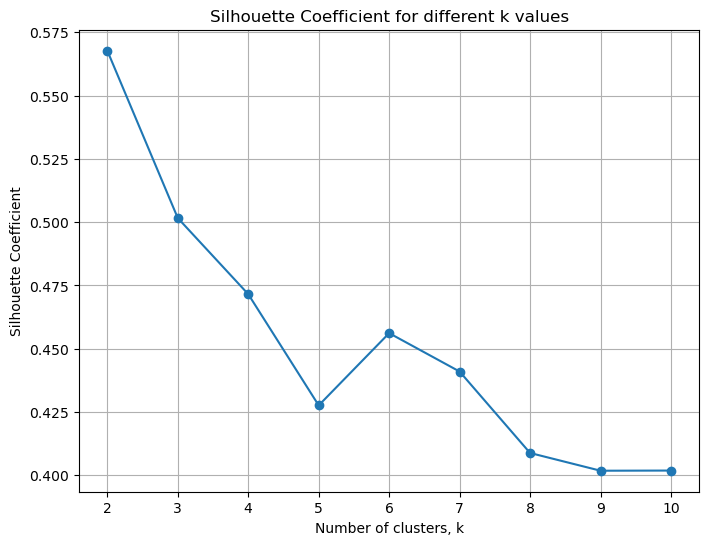

The optimal number of clusters (k) is: 2


In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k_values = range(2, 11)  #starting from k=2 to k=10 or more
silhouette_scores = []

# Calculating the Silhouette Coefficient for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Finding the optimal k (the one with the maximum silhouette score)
optimal_k = k_values[np.argmax(silhouette_scores)]

# Plotting the silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Coefficient for different k values')
plt.grid(True)
plt.show()

print(f"The optimal number of clusters (k) is: {optimal_k}")

#### 3. Create clusters using Kmeans and Kmeans++ algorithms with optimal k value found in the previous problem. Report performances using appropriate evaluation metrics. Compare the results.

KMeans Inertia: 504935.4804102435
KMeans++ Inertia: 504935.4804102435
KMeans Silhouette Score: 0.5677367822428903
KMeans++ Silhouette Score: 0.5677367822428903


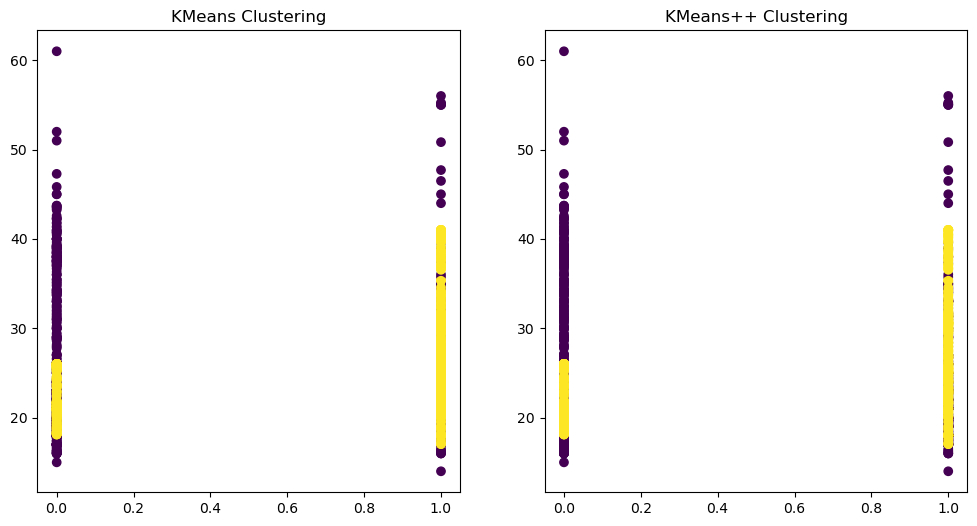

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
import matplotlib.pyplot as plt

optimal_k = 2 

# Implementing KMeans
kmeans = KMeans(n_clusters=optimal_k, init='random', random_state=42)
kmeans.fit(X)

# Implementing KMeans++
kmeans_pp = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmeans_pp.fit(X)

# Evaluate performance
inertia_kmeans = kmeans.inertia_
inertia_kmeans_pp = kmeans_pp.inertia_

silhouette_kmeans = silhouette_score(X, kmeans.labels_)
silhouette_kmeans_pp = silhouette_score(X, kmeans_pp.labels_)

print(f"KMeans Inertia: {inertia_kmeans}")
print(f"KMeans++ Inertia: {inertia_kmeans_pp}")
print(f"KMeans Silhouette Score: {silhouette_kmeans}")
print(f"KMeans++ Silhouette Score: {silhouette_kmeans_pp}")

# Visualization (if needed)
plt.figure(figsize=(12, 6))

# Plot KMeans
plt.subplot(1, 2, 1)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('KMeans Clustering')

# Plot KMeans++
plt.subplot(1, 2, 2)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=kmeans_pp.labels_, cmap='viridis')
plt.title('KMeans++ Clustering')

plt.show()


* From the observation KMeans and KMeans++ inertia and silhouette Score is same.

#### 4. Now repeat clustering using KMeans for 50 times and report the average performance. Again compare the results that you have obtained in Q3 using Kmeans++ and explain the difference.


In [20]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

optimal_k = 2  

# Variables to accumulate performance metrics
inertia_list = []
silhouette_list = []

# K-Means clustering 50 times
for _ in range(50):
    kmeans = KMeans(n_clusters=optimal_k, init='random', random_state=None)
    kmeans.fit(X)
    
    inertia_list.append(kmeans.inertia_)
    silhouette_list.append(silhouette_score(X, kmeans.labels_))

# Calculating average performance metrics
average_inertia = np.mean(inertia_list)
average_silhouette = np.mean(silhouette_list)

print(f"Average KMeans Inertia over 50 runs: {average_inertia}")
print(f"Average KMeans Silhouette Score over 50 runs: {average_silhouette}")

# Comparing with K-Means++
kmeans_pp_inertia = inertia_kmeans_pp  
kmeans_pp_silhouette = silhouette_kmeans_pp  

print(f"KMeans++ Inertia: {kmeans_pp_inertia}")
print(f"KMeans++ Silhouette Score: {kmeans_pp_silhouette}")


Average KMeans Inertia over 50 runs: 504935.4804102435
Average KMeans Silhouette Score over 50 runs: 0.5677367822428901
KMeans++ Inertia: 504935.4804102435
KMeans++ Silhouette Score: 0.5677367822428903


* The Average Kmeans over 50 times and Kmeans++ inertia is same and silhouette score is also similar.

#### 5. Apply DBSCAN on this same Obesity dataset and find the optimum "eps" and "min_samples" value. Is the number of clusters the same as the cluster found in Q2? Explain the similarity or differences that you have found between two solutions.


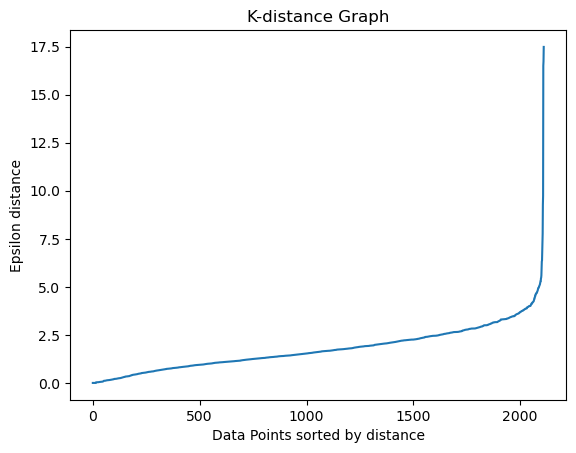

In [21]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors


# Finding the optimal `eps` using k-distance graph
nearest_neighbors = NearestNeighbors(n_neighbors=5)  # min_samples = 5
neighbors = nearest_neighbors.fit(X)
distances, indices = neighbors.kneighbors(X)

# Sort distances and plot
distances = np.sort(distances[:, 4], axis=0)  # 4th neighbor (k-1)
plt.plot(distances)
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon distance')
plt.title('K-distance Graph')
plt.show()

# choosing the "elbow" point on this plot as the optimal `eps`.



* 4.0 is the optimal epsilon where the elbow is formed.

In [22]:
# Apply DBSCAN
optimal_eps = 4.0  
min_samples = 5  

dbscan = DBSCAN(eps=optimal_eps, min_samples=min_samples)
dbscan.fit(X)

# Get the labels from DBSCAN
dbscan_labels = dbscan.labels_

# Counting the number of clusters found (ignoring noise points labeled as -1)
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f"Number of clusters found by DBSCAN: {n_clusters_dbscan}")

# Comparing with K-Means/K-Means++
n_clusters_kmeans = optimal_k  # Replace with the optimal k found in Q2
print(f"Number of clusters found by K-Means: {n_clusters_kmeans}")



Number of clusters found by DBSCAN: 2
Number of clusters found by K-Means: 2


* From the observation of DBScan and KMeans with optimal K and Epsilon we got 2 clusters for obesity.

#### 6. Load the “gene expression” dataset. Apply PCA on the genes for generating 3 principal components. Plot the first three components of the PCA.

### Problem statement

This collection of data is part of the RNA-Seq (HiSeq) PANCAN data set, it is a random extraction of gene expressions of patients having different types of tumor.

### Features

* 20531 genes

### Target 

* class- BRCA, KIRC, COAD, LUAD and PRAD.

In [23]:
# load the dataset
d1 = pd.read_csv("F:/Data Science/Datasets/TCGA-PANCAN-HiSeq-801x20531/data.csv")

In [24]:
d1.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [25]:
d1.shape

(801, 20532)

* This d1 dataset has 801 rows and 20532 features.

In [26]:
d2 = pd.read_csv("F:/Data Science/Datasets/TCGA-PANCAN-HiSeq-801x20531/labels.csv")

In [27]:
d2.head()

,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA


In [28]:
d2.shape

(801, 2)

* d2 is Labels dataset consist of 801 rows and 2 columns.

In [29]:
#Merge two dataset to single dataframe
df = pd.merge(d1,d2, on='Unnamed: 0')

In [30]:
df.columns

Index(['Unnamed: 0', 'gene_0', 'gene_1', 'gene_2', 'gene_3', 'gene_4',
       'gene_5', 'gene_6', 'gene_7', 'gene_8',
       ...
       'gene_20522', 'gene_20523', 'gene_20524', 'gene_20525', 'gene_20526',
       'gene_20527', 'gene_20528', 'gene_20529', 'gene_20530', 'Class'],
      dtype='object', length=20533)

In [31]:
df.isnull().sum()

Unnamed: 0    0
gene_0        0
gene_1        0
gene_2        0
gene_3        0
             ..
gene_20527    0
gene_20528    0
gene_20529    0
gene_20530    0
Class         0
Length: 20533, dtype: int64

* There are no null values.

In [32]:
df['Class'].value_counts()

Class
BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: count, dtype: int64

* Among the **BRCA** type of tumor patients is high compared to other types.

In [33]:
df.drop(columns='Unnamed: 0', inplace=True)

* We'll drop the Unnamed column since its no use for analysis.

In [34]:
df.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,PRAD
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,LUAD
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,PRAD
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,PRAD
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,BRCA


#### We'll do label encoding for the further analysis. 

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Class'] = le.fit_transform(df['Class'])

df.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,4
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,3
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,4
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,4
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,0


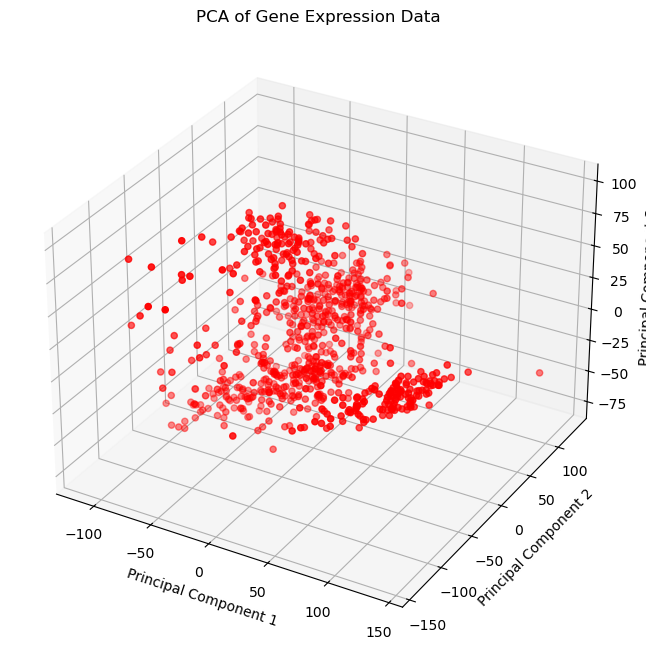

In [36]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Applying PCA to reduce to 3 components
pca = PCA(n_components=3)
pca_components = pca.fit_transform(scaled_data)

# Plotting the first three components
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_components[:, 0], pca_components[:, 1], pca_components[:, 2], c='r', marker='o')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA of Gene Expression Data')

plt.show()

* From PC component 1,2 and 3 most of the gene expressions lies from -100 to 50.

#### 7. Continue from question 6, what is the variance (%) covered by the first three components? Explain how this percentage of variance has been computed?

In [37]:
# Get explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the percentage of variance covered by the first three components
variance_covered = explained_variance_ratio.sum() * 100

print(f"Percentage of variance covered by the first three components: {variance_covered:.2f}%")

Percentage of variance covered by the first three components: 27.10%


* The distance between each datapoints from from three principal components are 27.10 % 
* It calculated as from PCA it has function to calculate the variance named explained_variance_ratio_
* From the calculated variance sum all the distance between and multiply with 100  to get coverage.

#### 8. Continue from question 6, apply KMeans on the original features of the gene dataset and the first three components returned by PCA. Compare the results using the given labels.

In [38]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, confusion_matrix, classification_report
import numpy as np

print(d1.head())
print(d2.head())



  Unnamed: 0  gene_0    gene_1    gene_2    gene_3     gene_4  gene_5  \
0   sample_0     0.0  2.017209  3.265527  5.478487  10.431999     0.0   
1   sample_1     0.0  0.592732  1.588421  7.586157   9.623011     0.0   
2   sample_2     0.0  3.511759  4.327199  6.881787   9.870730     0.0   
3   sample_3     0.0  3.663618  4.507649  6.659068  10.196184     0.0   
4   sample_4     0.0  2.655741  2.821547  6.539454   9.738265     0.0   

     gene_6    gene_7  gene_8  ...  gene_20521  gene_20522  gene_20523  \
0  7.175175  0.591871     0.0  ...    4.926711    8.210257    9.723516   
1  6.816049  0.000000     0.0  ...    4.593372    7.323865    9.740931   
2  6.972130  0.452595     0.0  ...    5.125213    8.127123   10.908640   
3  7.843375  0.434882     0.0  ...    6.076566    8.792959   10.141520   
4  6.566967  0.360982     0.0  ...    5.996032    8.891425   10.373790   

   gene_20524  gene_20525  gene_20526  gene_20527  gene_20528  gene_20529  \
0    7.220030    9.119813   12.003135  

In [39]:
d1.drop(columns = 'Unnamed: 0', inplace=True)

In [40]:
d2.drop(columns = 'Unnamed: 0', inplace=True)

In [41]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(d1)

In [42]:
# Apply KMeans to the original features
kmeans_original = KMeans(n_clusters=len(np.unique(d2)), random_state=42)
clusters_original = kmeans_original.fit_predict(scaled_data)

In [43]:
# Apply PCA to reduce to 3 components
pca = PCA(n_components=3)
pca_components = pca.fit_transform(scaled_data)

# Apply KMeans to the PCA components
kmeans_pca = KMeans(n_clusters=len(np.unique(d2)), random_state=42)
clusters_pca = kmeans_pca.fit_predict(pca_components)

In [44]:
# Ensure labels are numeric
if d2.dtypes[0] == 'object':
    labels = pd.factorize(d2.values.ravel())[0]
else:
    labels = d2.values.ravel()

In [45]:
# Evaluate clustering results
def evaluate_clustering(clusters, labels):
    print("Silhouette Score:", silhouette_score(scaled_data, clusters))
    print("Confusion Matrix:\n", confusion_matrix(labels, clusters))
    print("Classification Report:\n", classification_report(labels, clusters))

print("Results for K-Means on Original Features:")
evaluate_clustering(clusters_original, labels)

print("Results for K-Means on PCA Components:")
evaluate_clustering(clusters_pca, labels)

Results for K-Means on Original Features:
Silhouette Score: 0.13533091049813498
Confusion Matrix:
 [[134   0   1   1   0]
 [  0   0 139   2   0]
 [  0   0  51 249   0]
 [  0   0   3   0 143]
 [  0  74   4   0   0]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       136
           1       0.00      0.00      0.00       141
           2       0.26      0.17      0.20       300
           3       0.00      0.00      0.00       146
           4       0.00      0.00      0.00        78

    accuracy                           0.23       801
   macro avg       0.25      0.23      0.24       801
weighted avg       0.27      0.23      0.25       801

Results for K-Means on PCA Components:
Silhouette Score: 0.11474514224040808
Confusion Matrix:
 [[129   1   0   0   6]
 [  0 120  18   1   2]
 [ 10  59  28   0 203]
 [  0   6   1 139   0]
 [  0   9  69   0   0]]
Classification Report:
               precision    recall  f

### Conclusion 
* Compared to Original and PCA both performed better in observation of accuracy
* In terms of Precision and Recall Kmeans with PCA components performed better.

# References:

1) “UCI Machine Learning Repository,” archive.ics.uci.edu, Aug. 26, 2019. https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition


2) “UCI Machine Learning Repository,” archive.ics.uci.edu. https://archive.ics.uci.edu/dataset/401/gene+expression+cancer+rna+seq